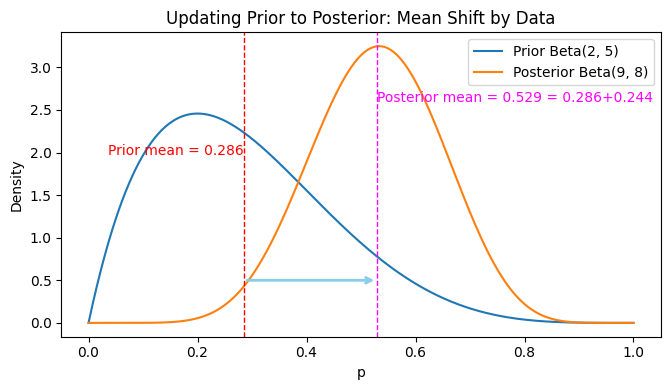

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters
alpha = 2
beta_param = 5

# Data: k successes out of n trials
k = 7
n = 10

# Posterior parameters
a_post = alpha + k
b_post = beta_param + n - k

# Grid for plotting densities
p = np.linspace(0, 1, 500)

# Compute densities
prior_pdf = beta.pdf(p, alpha, beta_param)
post_pdf  = beta.pdf(p, a_post, b_post)

# Calculate means
mean_prior = alpha / (alpha + beta_param)
mean_post = a_post / (a_post + b_post)
epsilon = mean_post - mean_prior  # improvement due to data

# Plot
plt.figure(figsize=(7, 4))
plt.plot(p, prior_pdf, label=f"Prior Beta({alpha}, {beta_param})")
plt.plot(p, post_pdf, label=f"Posterior Beta({a_post}, {b_post})")

# Add vertical lines for means
plt.axvline(mean_prior, color='red', linestyle='--', linewidth=1)
plt.axvline(mean_post, color='magenta', linestyle='--', linewidth=1)

# Add text labels showing the update
plt.text(mean_prior, max(prior_pdf)*0.8, f"Prior mean = {mean_prior:.3f}", color='red', ha='right')
plt.text(mean_post, max(post_pdf)*0.8, f"Posterior mean = {mean_post:.3f} = {mean_prior:.3f}+{epsilon:.3f}", 
         color='magenta', ha='left')

# Add horizontal arrow at y = 0.5
y_arrow = 0.5
plt.annotate(
    '', 
    xy=(mean_post, y_arrow), 
    xytext=(mean_prior, y_arrow),
    arrowprops=dict(arrowstyle='->', color='skyblue', lw=2)
)

plt.xlabel("p")
plt.ylabel("Density")
plt.title("Updating Prior to Posterior: Mean Shift by Data")
plt.legend()
plt.tight_layout()
plt.savefig('img/mean_shift.png')
plt.show()


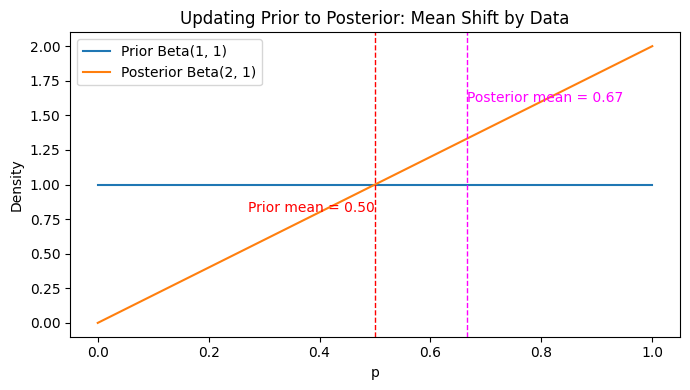

In [2]:
"""
Bayesian updating with Beta-Binomial model
Demonstrates prior -> posterior update with minimal data (k=1, n=1)
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters (uniform prior)
alpha = 1
beta_param = 1

# Data: k successes out of n trials
k = 1
n = 1

# Posterior parameters
a_post = alpha + k
b_post = beta_param + n - k

# Grid for plotting densities
p = np.linspace(0, 1, 500)

# Compute densities
prior_pdf = beta.pdf(p, alpha, beta_param)
post_pdf  = beta.pdf(p, a_post, b_post)

# Means
mean_prior = alpha / (alpha + beta_param)
mean_post = a_post / (a_post + b_post)
epsilon = mean_post - mean_prior

# Plot
plt.figure(figsize=(7, 4))
plt.plot(p, prior_pdf, label=f"Prior Beta({alpha}, {beta_param})")
plt.plot(p, post_pdf, label=f"Posterior Beta({a_post}, {b_post})")
plt.axvline(mean_prior, color='red', linestyle='--', linewidth=1)
plt.axvline(mean_post, color='magenta', linestyle='--', linewidth=1)
plt.text(mean_prior, max(prior_pdf)*0.8, f"Prior mean = {mean_prior:.2f}", color='red', ha='right')
plt.text(mean_post, max(post_pdf)*0.8, f"Posterior mean = {mean_post:.2f}", color='magenta', ha='left')
plt.xlabel("p")
plt.ylabel("Density")
plt.title("Updating Prior to Posterior: Mean Shift by Data")
plt.legend()
plt.tight_layout()
plt.show()
